In [1]:
#importing the required libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.util import random_noise
from PIL import Image
from scipy import ndimage

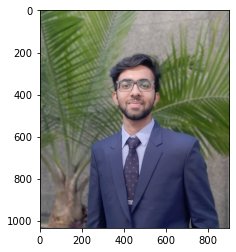

In [2]:
# reading the image that we have to work upon
img = cv2.imread(r"Prakhar Jadaun.jpg")
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# amount of noise we have to apply on original image
noise = 0.009

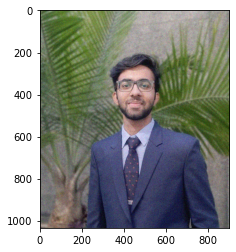

In [4]:
# adding gaussian noise to the image
# first convert image to ndarray
img_arr = np.asarray(img)

# random_noise() method will convert image in [0, 255] to [0, 1.0],
# inherently it use np.random.normal() to create normal distribution
gnoise_img = random_noise(img_arr, mode='gaussian', var=noise)

#converting generated array back to image
gnoise_img = (255*gnoise_img).astype(np.uint8)
# gnoise_img = Image.fromarray(gnoise_img)
# gnoise_img = cv2.cvtColor(np.array(gnoise_img),cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(gnoise_img,cv2.COLOR_BGR2RGB))
plt.show()

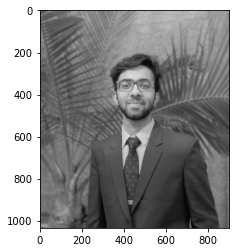

In [5]:
# now converting the orginal image to grayscale image for further addition of salt and pepper noise
grayImg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(grayImg,cv2.COLOR_BGR2RGB))
plt.show()

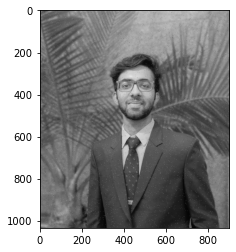

In [6]:
# adding salt and pepper noise to the original image
snp_img = random_noise(grayImg,mode='s&p',amount=noise)
snp_img = (255*snp_img).astype(np.uint8)
plt.imshow(cv2.cvtColor(snp_img,cv2.COLOR_BGR2RGB))
plt.show()

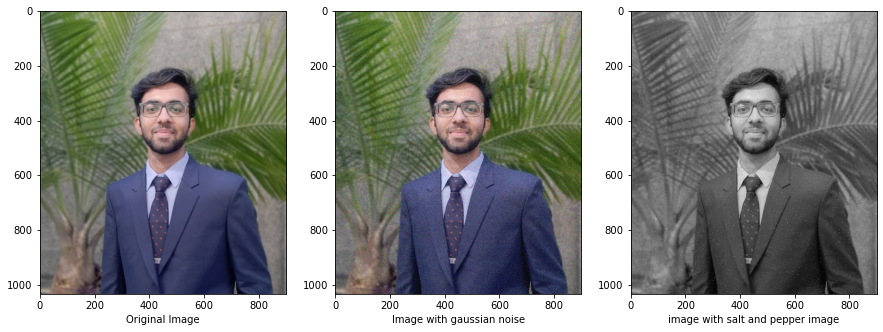

In [7]:
fig = plt.figure(figsize=(15,10))
rows = 1
columns = 3

fig.add_subplot(rows,columns,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.xlabel("Original Image")

fig.add_subplot(rows,columns,2)
plt.imshow(cv2.cvtColor(gnoise_img,cv2.COLOR_BGR2RGB))
plt.xlabel("Image with gaussian noise")

fig.add_subplot(rows,columns,3)
plt.imshow(cv2.cvtColor(snp_img,cv2.COLOR_BGR2RGB))
plt.xlabel("image with salt and pepper image")
plt.show()

## **Five Edge detection techniques**


### **Sobel Edge detection**

In [91]:
# function to apply sobel edge detection
def sobel_edge_detector(img,str):
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0)
    grad_y = cv2.Sobel(img, cv2.CV_64F, 0, 1)
    grad = np.sqrt(grad_x**2 + grad_y**2)
    grad_norm = (grad * 255 / grad.max()).astype(np.uint8)
    # plt.figure(figsize=(10,8))
    # plt.imshow(cv2.cvtColor(grad_norm,cv2.COLOR_BGR2RGB))

    fig = plt.figure(figsize=(10,8))
    rows = 1
    columns = 2

    fig.add_subplot(rows,columns,1)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.xlabel(str)

    fig.add_subplot(rows,columns,2)
    plt.imshow(cv2.cvtColor(grad_norm,cv2.COLOR_BGR2RGB))
    plt.xlabel("Sobel Edge detection applied")
    plt.show()

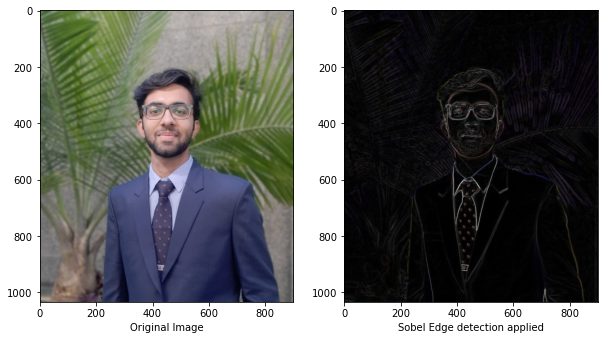

In [92]:
# applying sobel edge detection techniques on original image
sobel_edge_detector(img,"Original Image")

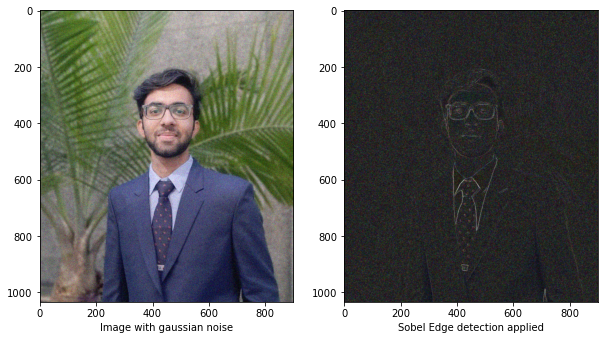

In [93]:
# applying sobel edge detection techniques on image with gaussian noise 
sobel_edge_detector(gnoise_img,"Image with gaussian noise")

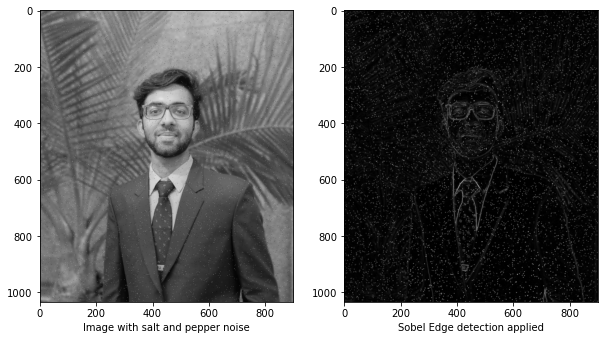

In [94]:
# applying sobel edge detection techniques on image with salt and pepper noise 
sobel_edge_detector(snp_img,"Image with salt and pepper noise")

### **Prewitt Edge Detection**

In [95]:
def isgray(checkImg):
    if len(checkImg.shape) < 3: 
        return True
    if checkImg.shape[2]  == 1: 
        return True
    b,g,r = checkImg[:,:,0], checkImg[:,:,1], checkImg[:,:,2]
    if (b==g).all() and (b==r).all(): 
        return True
    return False

In [96]:
def prewittEdgeDetection(origImg,str):
    #define horizontal and Vertical sobel kernels
    temp = origImg
    if isgray(origImg) == False:
        origImg = cv2.cvtColor(origImg,cv2.COLOR_BGR2GRAY)
    Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
    Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

    #normalizing the vectors
    pre_x = ndimage.convolve(origImg, Hx) / 6.0
    pre_y = ndimage.convolve(origImg, Hy) / 6.0

    #calculate the gradient magnitude of vectors
    pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
    # mapping values from 0 to 255
    pre_out = ((pre_out / np.max(pre_out)) * 255)
    pre_out = pre_out.astype('float32')
    pre_out = pre_out.astype(np.uint8)
    # plt.imshow(cv2.cvtColor(pre_out,cv2.COLOR_BGR2RGB))
    # plt.show()

    fig = plt.figure(figsize=(10,8))
    rows = 1
    columns = 2

    fig.add_subplot(rows,columns,1)
    plt.imshow(cv2.cvtColor(temp,cv2.COLOR_BGR2RGB))
    plt.xlabel(str)

    fig.add_subplot(rows,columns,2)
    plt.imshow(cv2.cvtColor(pre_out,cv2.COLOR_BGR2RGB))
    plt.xlabel("Prewitt Edge detection applied")
    
    plt.show()

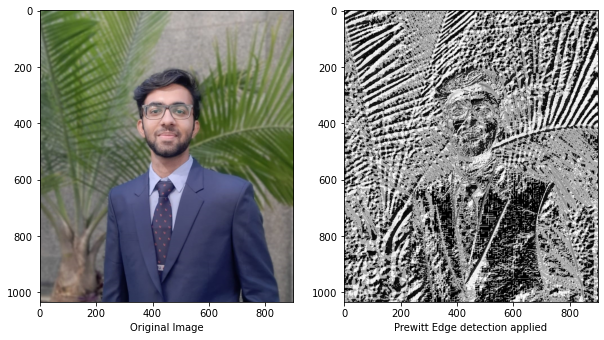

In [97]:

prewittEdgeDetection(img,"Original Image")

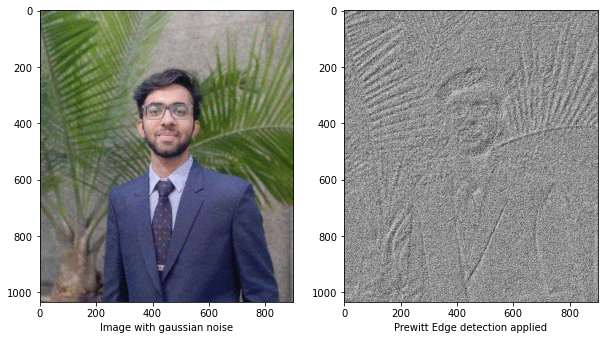

In [98]:
prewittEdgeDetection(gnoise_img,"Image with gaussian noise")

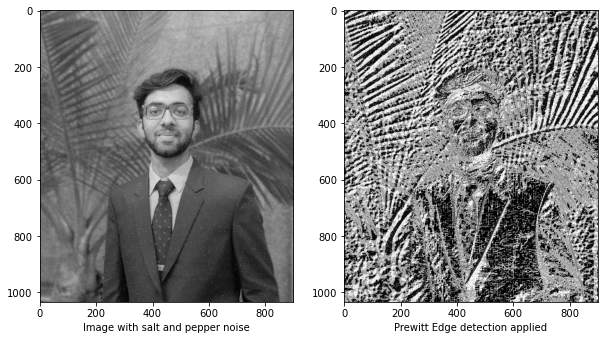

In [99]:
prewittEdgeDetection(snp_img,"Image with salt and pepper noise")

### **Robert Edge Detection**

In [100]:
def robertEdgeDetection(img,str):
    roberts_cross_v = np.array([[1,0],
                                [0,-1]])
    roberts_cross_h = np.array([[0,1],
                                [-1,0]])
    tempImg = img
    if isgray(tempImg) == False:
        tempImg = cv2.cvtColor(tempImg,cv2.COLOR_BGR2GRAY)
        tempImg = tempImg/255.0
    vertical = ndimage.convolve( tempImg, roberts_cross_v )
    horizontal = ndimage.convolve( tempImg, roberts_cross_h )
    edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
    edged_img*=255
    edged_img = edged_img.astype('float32')
    edged_img = edged_img.astype(np.uint8)
    # plt.imshow(cv2.cvtColor(edged_img,cv2.COLOR_GRAY2RGB))

    fig = plt.figure(figsize=(10,8))
    rows = 1
    columns = 2

    fig.add_subplot(rows,columns,1)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.xlabel(str)

    fig.add_subplot(rows,columns,2)
    plt.imshow(cv2.cvtColor(edged_img,cv2.COLOR_GRAY2RGB))
    plt.xlabel("Robert Edge detection applied")
    
    plt.show()

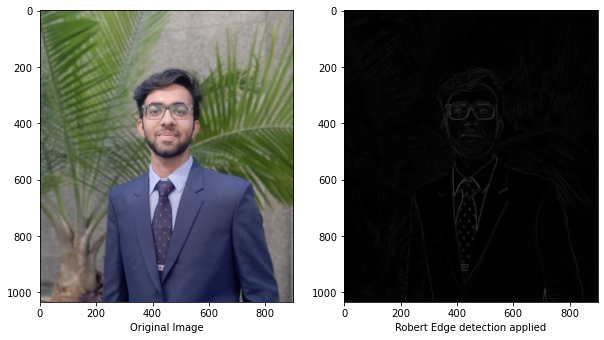

In [101]:
robertEdgeDetection(img,"Original Image")

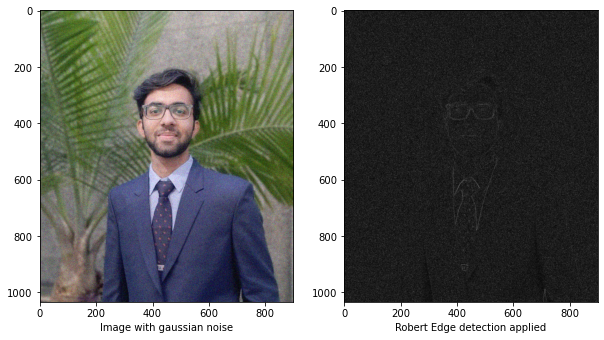

In [102]:
robertEdgeDetection(gnoise_img,"Image with gaussian noise")

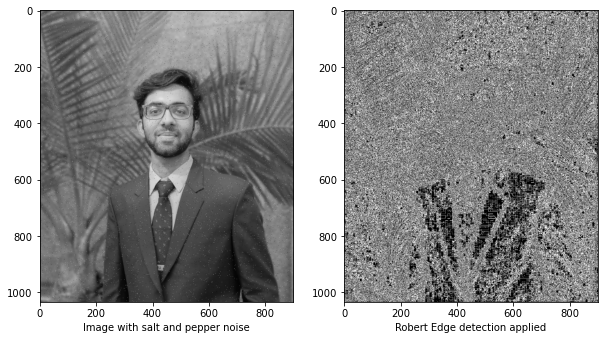

In [103]:
robertEdgeDetection(snp_img,"Image with salt and pepper noise")

### **Canny Edge Detection**

In [104]:
# function to implement the canny edge detection and plot the desired images
def cannyEdgeDetection(img,str):
    # Setting parameter values
    t_lower = 20  # Lower Threshold
    t_upper = 150  # Upper threshold
  
    # Applying the Canny Edge filter
    edge = cv2.Canny(img, t_lower, t_upper)
    fig = plt.figure(figsize=(10,8))
    rows = 1
    columns = 2

    fig.add_subplot(rows,columns,1)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.xlabel(str)

    fig.add_subplot(rows,columns,2)
    plt.imshow(cv2.cvtColor(edge,cv2.COLOR_BGR2RGB))
    plt.xlabel("Canny Edge detection applied")

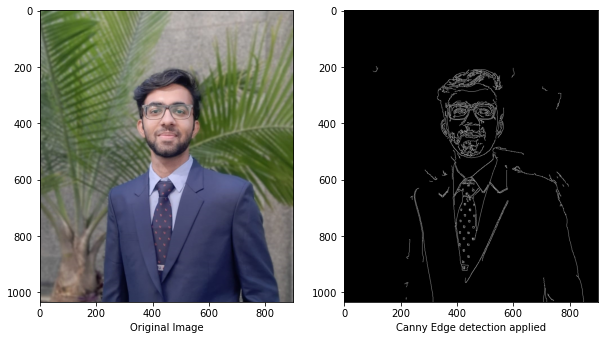

In [105]:
cannyEdgeDetection(img,"Original Image")

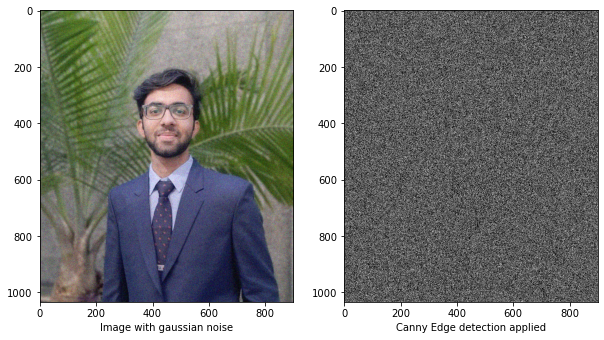

In [106]:
cannyEdgeDetection(gnoise_img,"Image with gaussian noise")

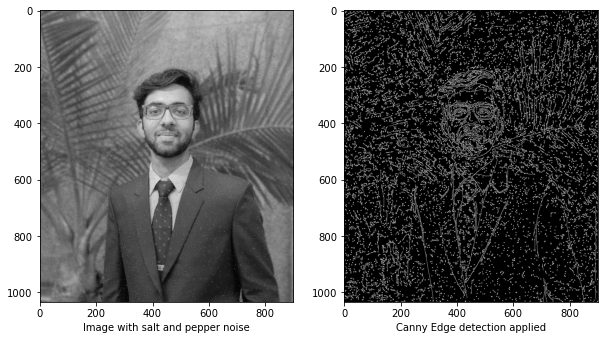

In [107]:
cannyEdgeDetection(snp_img,"Image with salt and pepper noise")

### **Laplacian of Gaussian Edge Detection**

In [108]:
# function to implement the laplacian edge detection
def laplacianEdgeDetection(origImg,str):
    laplacian = cv2.Laplacian(origImg,5,cv2.CV_64F)
    filtered_image = cv2.convertScaleAbs(laplacian)
    fig = plt.figure(figsize=(10,8))
    rows = 1
    columns = 2

    fig.add_subplot(rows,columns,1)
    plt.imshow(cv2.cvtColor(origImg,cv2.COLOR_BGR2RGB))
    plt.xlabel(str) 

    fig.add_subplot(rows,columns,2)
    plt.imshow(cv2.cvtColor(filtered_image,cv2.COLOR_BGR2RGB))
    plt.xlabel('Edge image')

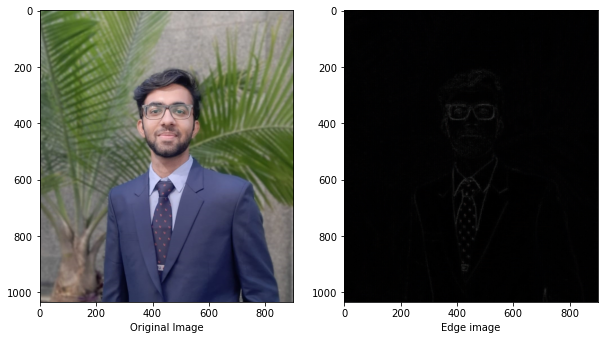

In [109]:
laplacianEdgeDetection(img,"Original Image")

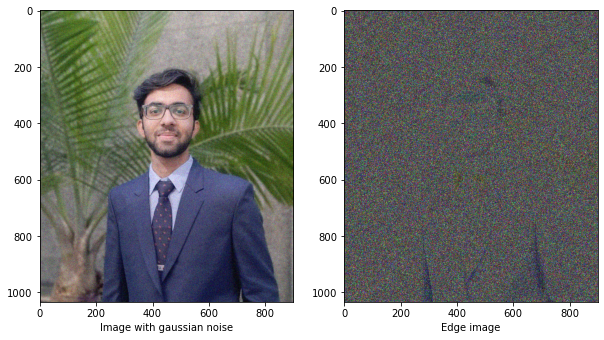

In [110]:
laplacianEdgeDetection(gnoise_img,"Image with gaussian noise")

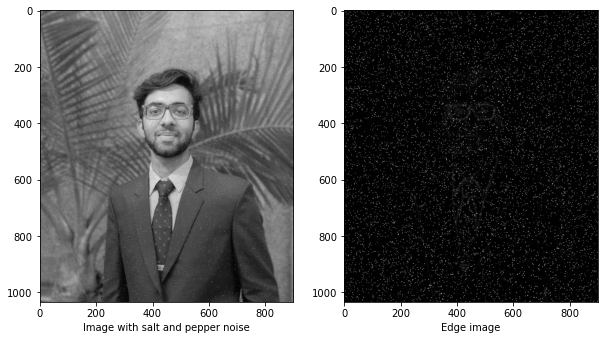

In [111]:
laplacianEdgeDetection(snp_img,"Image with salt and pepper noise")